### We will use the insurance claims dataset from kaggle to detect and predict any insurance fraud possibilities by using statistical and data modeling

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [35]:
df = pd.read_csv('insurance_claims.csv')

In [36]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [37]:
df.shape

(1000, 40)

In [38]:
for col in df.columns:
    print(df[col].value_counts())

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

As we can see there are '?' in some of the records, which mean that they are null values an hence we will replace them with NaN.

In [39]:
df.replace('?', np.nan, inplace = True)

# EDA and Data Cleaning

In [40]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [41]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The collision type, property damage, and police report available are categorical types and hence we will replace the missing values with mode (most frequent value) then mean or median.

In [42]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [43]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} has {df[col].isna().sum()} null values')
    else:
        pass

_c39 has 1000 null values


In [44]:
df.drop(["_c39"],axis=1,inplace=True)

#dropping certain columns as they are not required
df.drop(["incident_hour_of_the_day",'insured_zip','policy_bind_date','incident_location', 'incident_date', 'auto_year', 'age'],axis=1,inplace=True)

In [45]:
df.head()

,months_as_customer,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,521585,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,342868,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,NO,5070,780,780,3510,Mercedes,E400,Y
2,134,687698,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,227811,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,367455,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N


In [46]:
numerical_features = [col for col in df.columns if df[col].dtype != 'O']
numerical_features

['months_as_customer',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [47]:
numerical_data = df[numerical_features]

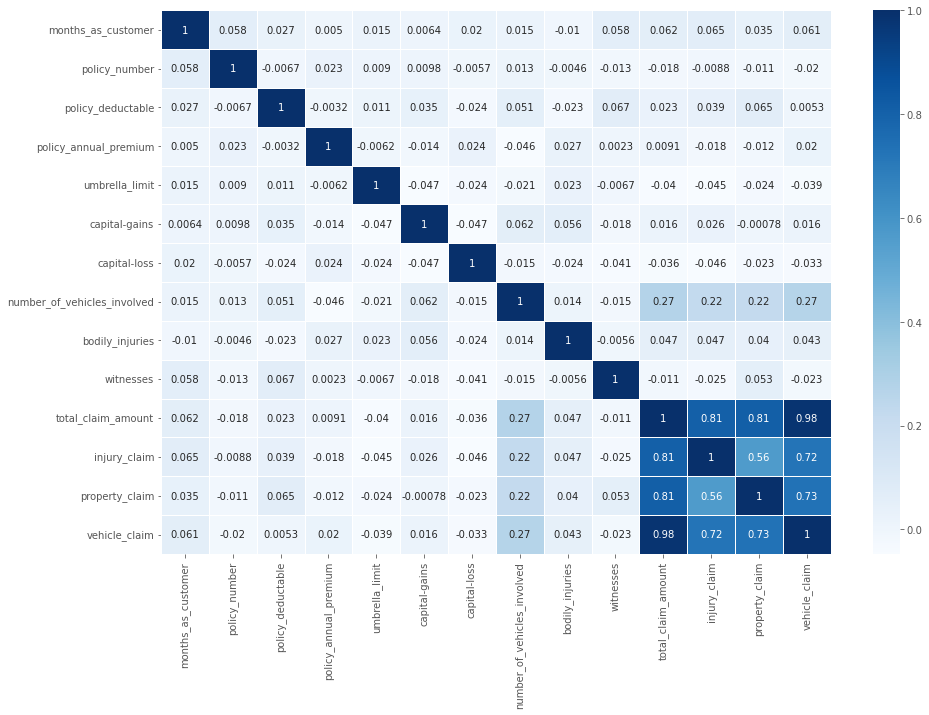

In [48]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = numerical_data.corr(), annot = True, linewidth = 1, cmap='Blues')
plt.show()

We can see that the total claim amount, injury claim, property claim, and vehicle claim have positive strong correlation with each other. we will validate by calculating the injury claim, property claim, and vehicle claim amounts sums to total claim or not. The age and months as customer also have a strong positive correlatin hence we will remove one of them as well.

In [49]:
df[df['total_claim_amount'] != df['injury_claim']+df['property_claim']+df['vehicle_claim']].shape[0]

0

In [51]:
# check for negative values
for col in numerical_features:
    if df[df[col] < 0].shape[0] > 1:
        print(f'{col} has {df[df[col] < 0].shape[0]} negative values')
        

capital-loss has 525 negative values


Since it is loss, negative values can be allowed for the capital-loss feature. Also from the correlation matrix, the age and months as customer have a very strong positive correlation and the total claim and vehicle claim also have a strong positive correlation. Hence we can drop the age and vehicle claim column.

In [52]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col} has {df[col].isna().sum()} null values')
    else:
        pass

After data imputation, we can now perform exploratory data analysis on the data before doing feature engineering.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

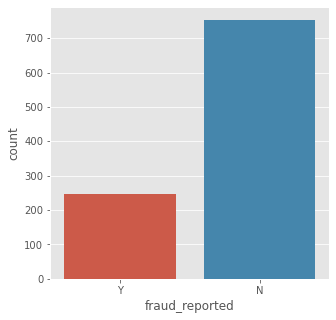

In [53]:
plt.figure(figsize = (5, 5))
sns.countplot(df['fraud_reported'])

In [54]:
df.columns

Index(['months_as_customer', 'policy_number', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

In [55]:
# df_fraud_yes = df[df['fraud_reported']=='Y']
# df_fraud_no = df[df['fraud_reported']=='N']
# sns.distplot(df_fraud_yes['total_claim_amount'], hist=False, label='Fraud')
# sns.distplot(df_fraud_no['total_claim_amount'], hist=False, label='Not Fraud')

# plt.figure(figsize =(15,5))
# ax = df.groupby('fraud_reported')['total_claim_amount'].plot(kind='kde', legend=True)
# plt.title('Fraud reported against total amount claimed')
# plt.xlabel('Total Claim Amount')
# plt.legend(title="Fraud Reported")

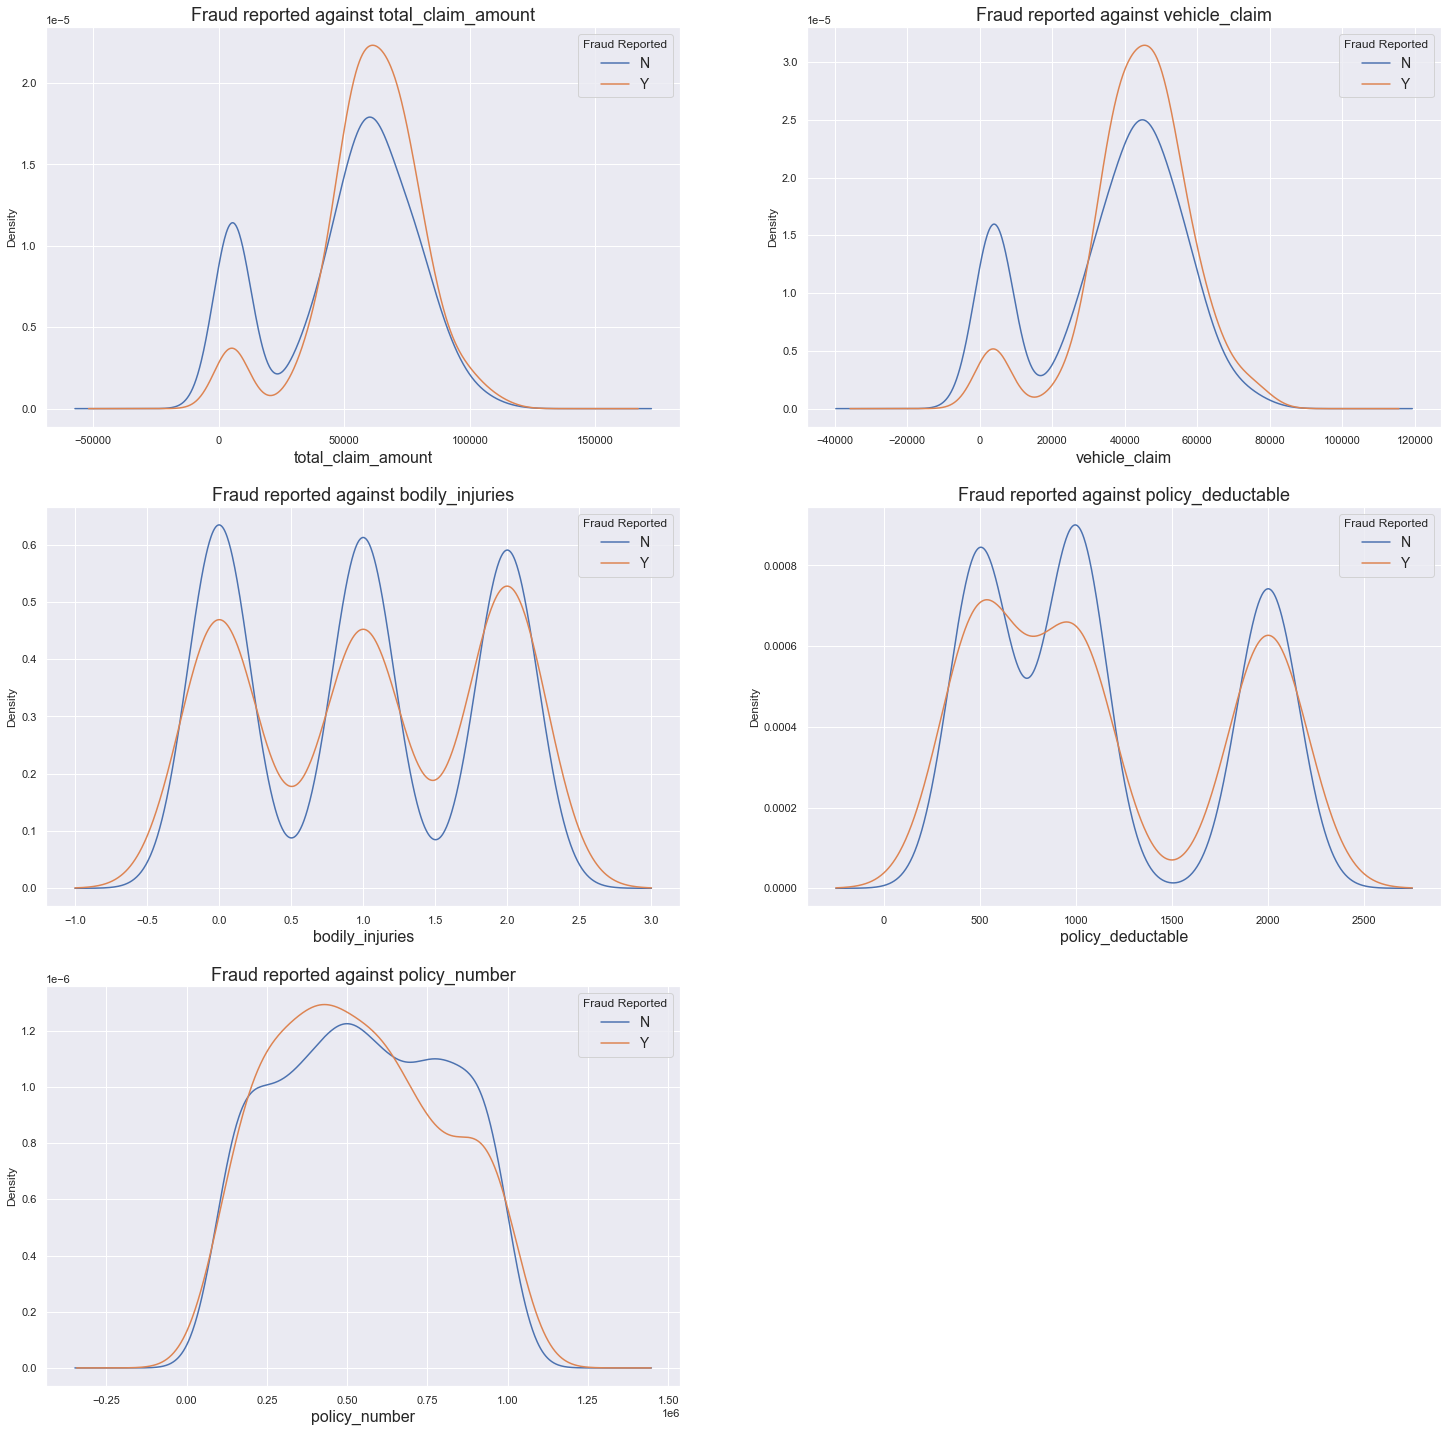

In [56]:
plot_cols = ['total_claim_amount', 'vehicle_claim', 'bodily_injuries', 'policy_deductable', 'policy_number']
i=1
fig = plt.figure(figsize = (25,25))
for col in plot_cols:
    sns.set(style="darkgrid")
    plt.subplot(3,2,i)
    ax = df.groupby('fraud_reported')[col].plot(kind='kde', legend=True)
    plt.title(f'Fraud reported against {col}', fontsize=18)
    plt.xlabel(f'{col}', fontsize=16)
    plt.legend(title="Fraud Reported", fontsize=14)
    i+=1

As we can see:
* The total claim and the vehicle claim amount graphs are mostly identical, this verifies that they both are highly correlated.
* Claims with very high claim amounts are more likely to be fraudulent.
* Policy number can also be a suspicious feature to detect fraudulent claims, it is imperative that a proper format must be set by each company to avoid fraudulent transactions.

In [57]:
df['insured_hobbies'].value_counts()[:10].index.to_list()

['reading',
 'exercise',
 'paintball',
 'bungie-jumping',
 'movies',
 'golf',
 'camping',
 'kayaking',
 'yachting',
 'hiking']

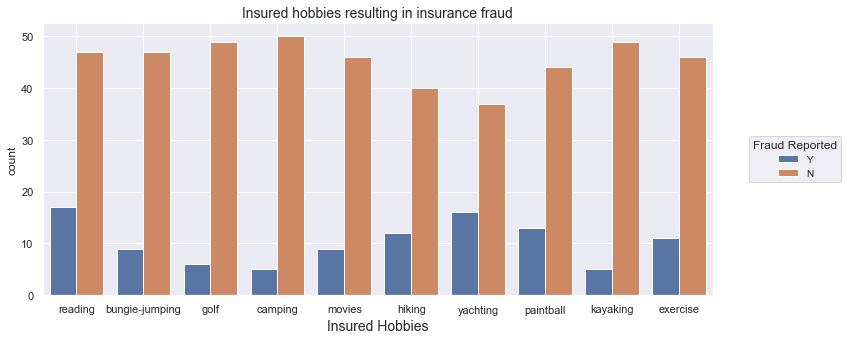

In [58]:
top10_hobbies = ['reading',
 'exercise',
 'paintball',
 'bungie-jumping',
 'movies',
 'golf',
 'camping',
 'kayaking',
 'yachting',
 'hiking']
hobbies = df.loc[df['insured_hobbies'].isin(top10_hobbies)]

fig = plt.figure(figsize = (12,5))
sns.countplot(data=hobbies, x='insured_hobbies', hue='fraud_reported')
plt.title('Insured hobbies resulting in insurance fraud', fontsize=14)
plt.xlabel('Insured Hobbies', fontsize=14)
plt.legend(bbox_to_anchor=(1.2,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.grid(visible=True, which='both')
plt.show()

The above bar graph shows the top 10 most frequent hobbies of the insurers.
* The hobbies mentioned such as reading, yachting, hiking, and exercise are most prone to being fraudulent claims.

In [59]:
categorical_data = df.select_dtypes(include = ['object'])
categorical_data.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N


In [60]:
for col in categorical_data.columns:
    print(f"{col}: {categorical_data[col].unique()}\n")

policy_state: ['OH' 'IN' 'IL']

policy_csl: ['250/500' '100/300' '500/1000']

insured_sex: ['MALE' 'FEMALE']

insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_hobbies: ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

insured_relationship: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: ['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: ['Majo

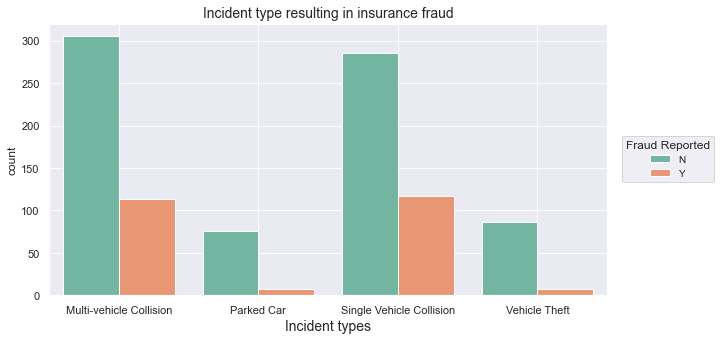

In [61]:
incident=df.groupby(['fraud_reported', 'incident_type']).count()
incident.reset_index(inplace=True)
incident = incident.rename(columns={"policy_number": "count"})
incident = incident[['fraud_reported', 'incident_type', 'count']]

fig = plt.figure(figsize = (10,5))
sns.barplot(data=incident, x='incident_type', y='count', hue='fraud_reported', palette='Set2')
plt.title('Incident type resulting in insurance fraud', fontsize=14)
plt.xlabel('Incident types', fontsize=14)
plt.legend(bbox_to_anchor=(1.2,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.grid(visible=True, which='both')
plt.show()

The above bar plot shows the the relation between the incident type and fraudulent claims. The incident types mentioned as single and multiple vehicle collision often tend to be fradulent and therefore must be validated carefully.

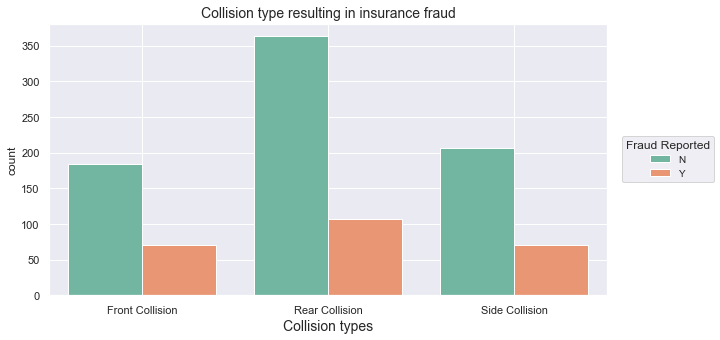

In [62]:
incident=df.groupby(['fraud_reported', 'collision_type']).count()
incident.reset_index(inplace=True)
incident = incident.rename(columns={"policy_number": "count"})
incident = incident[['fraud_reported', 'collision_type', 'count']]

fig = plt.figure(figsize = (10,5))
sns.barplot(data=incident, x='collision_type', y='count', hue='fraud_reported', palette='Set2')
plt.title('Collision type resulting in insurance fraud', fontsize=14)
plt.xlabel('Collision types', fontsize=14)
plt.legend(bbox_to_anchor=(1.2,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.grid(visible=True, which='both')
plt.show()

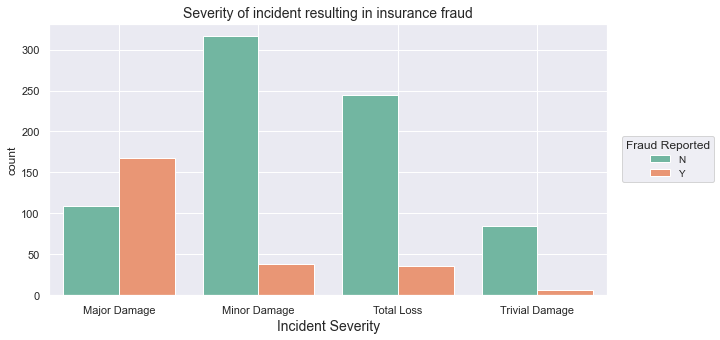

In [63]:
incident=df.groupby(['fraud_reported', 'incident_severity']).count()
incident.reset_index(inplace=True)
incident = incident.rename(columns={"policy_number": "count"})
incident = incident[['fraud_reported', 'incident_severity', 'count']]

fig = plt.figure(figsize = (10,5))
sns.barplot(data=incident, x='incident_severity', y='count', hue='fraud_reported', palette='Set2')
plt.title('Severity of incident resulting in insurance fraud', fontsize=14)
plt.xlabel('Incident Severity', fontsize=14)
plt.legend(bbox_to_anchor=(1.2,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.grid(visible=True, which='both')
plt.show()

* Severity of the incident mentioned as major damage tend to be fraudulent than other severity types.

In [64]:
categorical_data.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

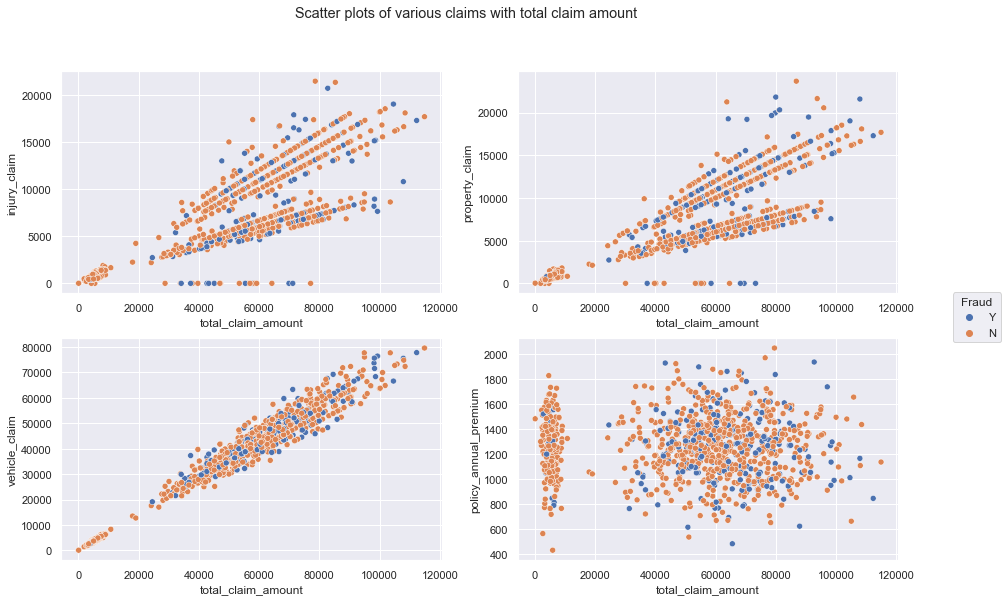

In [65]:
claim_cols = ['injury_claim',
 'property_claim',
 'vehicle_claim', 'policy_annual_premium']

i=1
fig = plt.figure(figsize = (15,9))
for col in claim_cols:
    sns.set(style="darkgrid")
    plt.subplot(2,2,i)
    ax = sns.scatterplot(data = df ,x ='total_claim_amount',y=col, hue='fraud_reported')
    ax.get_legend().remove()
    i+=1

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='right', bbox_to_anchor=(1, 0.5), title="Fraud")
fig.suptitle('Scatter plots of various claims with total claim amount')

plt.show()

* We can understand one thing from the above scatter plots that if the total claim amount and other claim costs are very low, like at the lower left corner, it is safe to say that there is no possibility of fraudulent insurance claim.
* Fraudulent claim occur arbitrarily when the total claim amount surpasses the 20000 threshold.

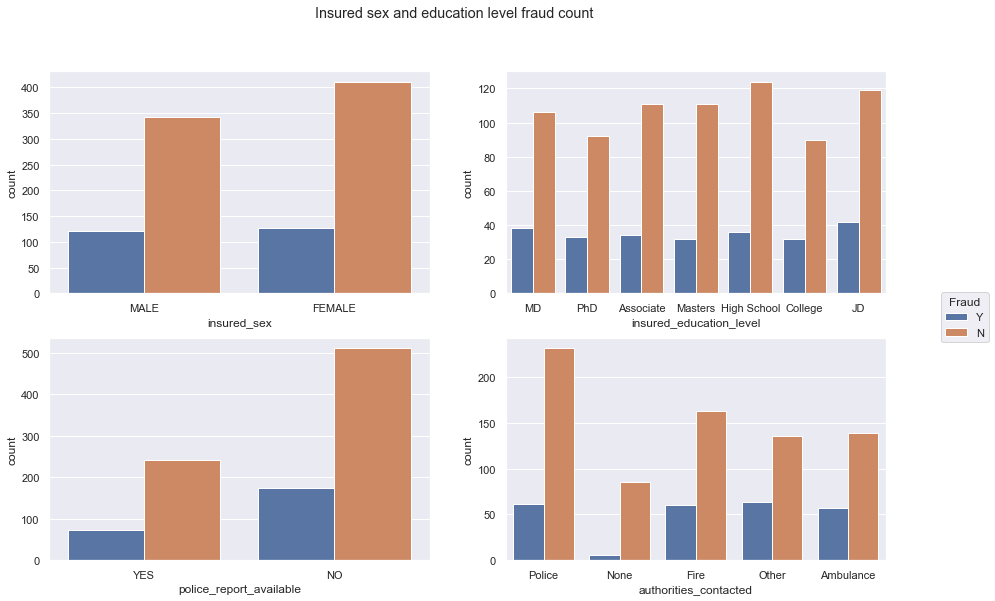

In [66]:
cols = ['insured_sex',
 'insured_education_level', 'police_report_available', 'authorities_contacted']

i=1
fig = plt.figure(figsize = (15,9))
for col in cols:
    sns.set(style="darkgrid")
    plt.subplot(2,2,i)
    ax = sns.countplot(data=categorical_data,x=col,hue='fraud_reported')
    ax.get_legend().remove()
    i+=1

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='right', bbox_to_anchor=(1, 0.5), title="Fraud")
fig.suptitle('Insured sex and education level fraud count')

plt.show()

In [67]:
#get top 10 occupation count
df['insured_occupation'].value_counts()[:10].index.to_list()

['machine-op-inspct',
 'prof-specialty',
 'tech-support',
 'sales',
 'exec-managerial',
 'craft-repair',
 'transport-moving',
 'other-service',
 'priv-house-serv',
 'armed-forces']

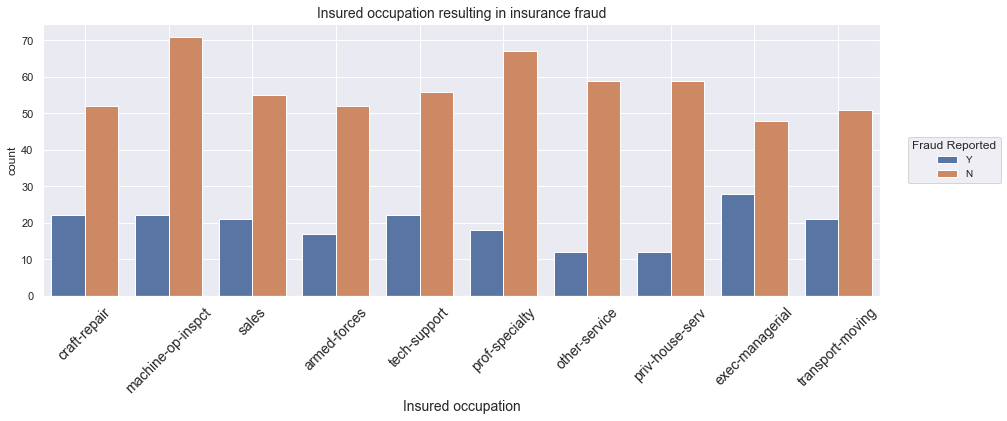

In [68]:
top10_occupation = ['machine-op-inspct',
 'prof-specialty',
 'tech-support',
 'sales',
 'exec-managerial',
 'craft-repair',
 'transport-moving',
 'other-service',
 'priv-house-serv',
 'armed-forces']
occupation = df.loc[df['insured_occupation'].isin(top10_occupation)]

fig = plt.figure(figsize = (15,5))
sns.countplot(data=occupation, x='insured_occupation', hue='fraud_reported')
plt.title('Insured occupation resulting in insurance fraud', fontsize=14)
plt.xlabel('Insured occupation', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.legend(bbox_to_anchor=(1.15,0.5), title="Fraud Reported", fontsize=10, loc='right')
plt.grid(visible=True, which='both')
plt.show()

* The above graphs do not give us any significant information about the occupation, education level, and sex of the people committing insurance fraud or claims fraud. 
* Although, in the insured occupation graph above, the occupation exec-managerial has a slight longer bar but that is not sufficient to sat that those occupation may lead to fradulent claims.
* From the police report bar graph, it is quiet clear that the claims which are not reported to police are often frauduent.

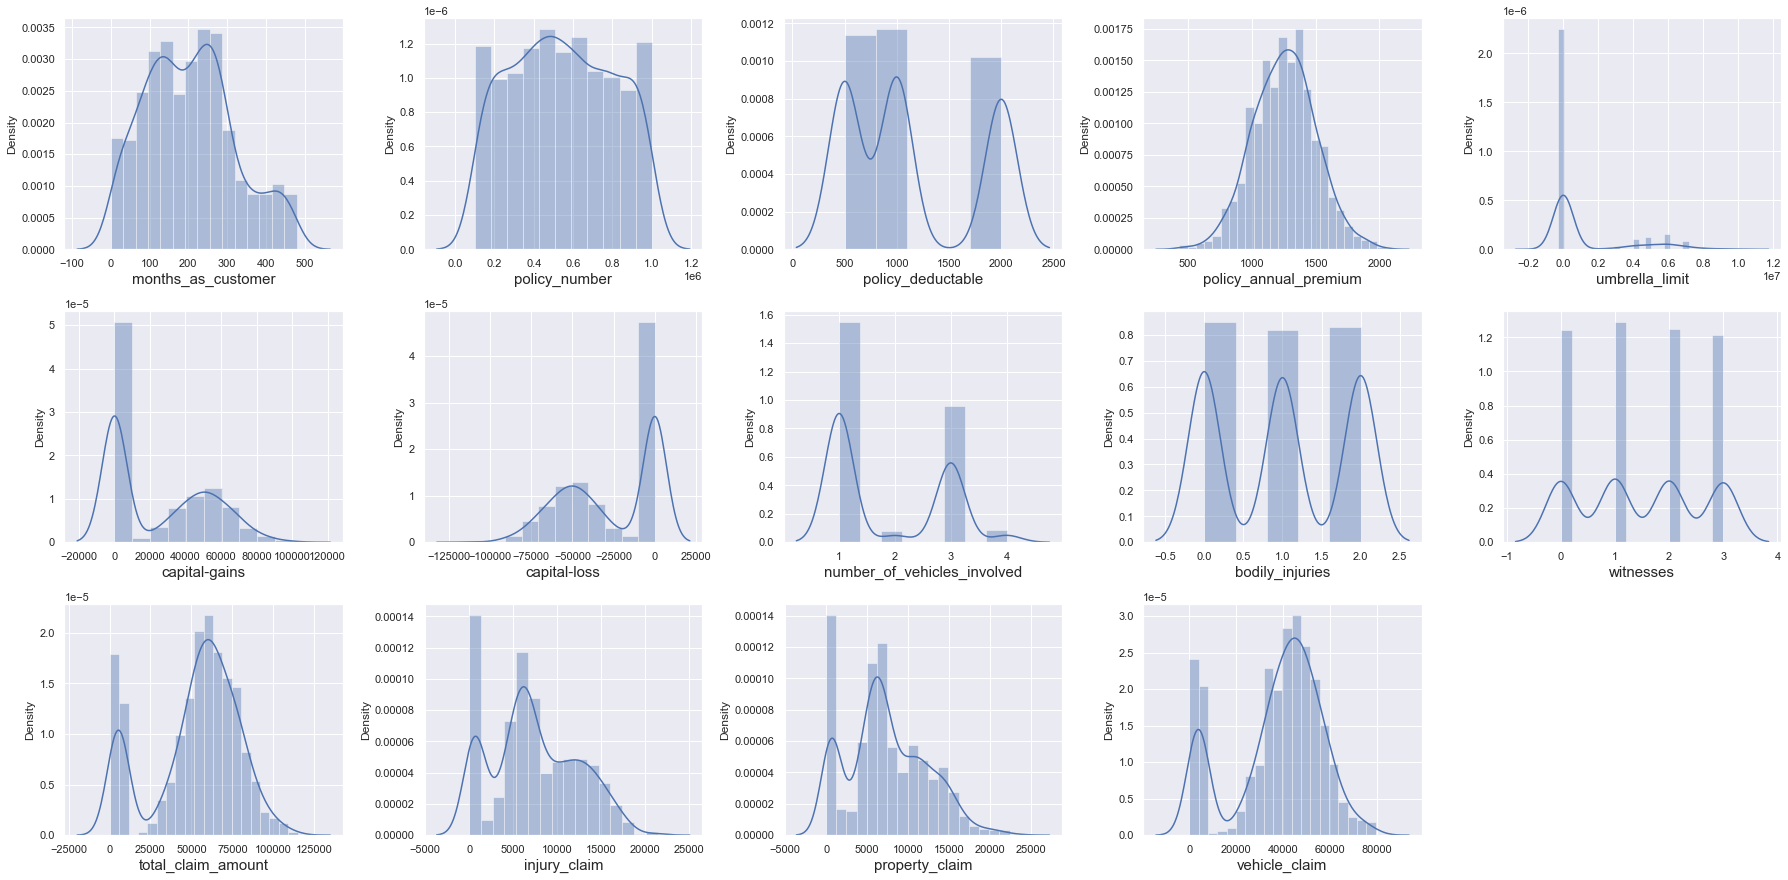

In [69]:
#Detecting outliers
plt.figure(figsize = (25, 20))
i = 1

for col in numerical_data.columns:
    if i <= 24:
        ax = plt.subplot(5, 5, i)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    i += 1
    
plt.tight_layout()
plt.show()

From the distribution plot, there are some features with outliers and we will use boxplot to identify the outliers.

In [70]:
numerical_features

['months_as_customer',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [71]:
outlier_features = ['policy_annual_premium', 'umbrella_limit', 'capital-gains',
 'capital-loss', 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

for col in outlier_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    min_Value = q1-1.5*IQR
    max_Value = q3+1.5*IQR

    outliers = []
    for i in df[col]:
        #print(i)
        if i< min_Value or i>max_Value:
            outliers.append(i)
    if len(outliers):
        print(f"Outliers in {col}:",len(outliers))


Outliers in policy_annual_premium: 9
Outliers in umbrella_limit: 202
Outliers in total_claim_amount: 1
Outliers in property_claim: 6


In [72]:
df.shape

(1000, 32)

Since dataset has just 100 records, removing the outliers results in 20% data loss. THerefore, we will fill the outliers with the upper and lower percentile values, i.e. top 5% of the data replaced by the 95th percentile value and same for lower 5% with value at 5th percentile. This is the most recommended method to deal with outliers when we have less data.

In [73]:
from scipy.stats.mstats import winsorize
# var=list(df.select_dtypes(include=['float64']).columns)
# for col_name in var:    
df['umbrella_limit'] = winsorize(df['umbrella_limit'], limits=[0.05, 0.05],inclusive=(True, True))

# Feature engineering and scaling

In [74]:
#One hot encoding of categorical data
encoded_data = categorical_data[['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model']]

In [75]:
categorical_data = pd.get_dummies(encoded_data, drop_first = True)
categorical_data.head()

,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [76]:
df.dtypes

months_as_customer               int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount       

In [77]:
df.shape

(1000, 32)

In [78]:
numerical_data.shape

(1000, 14)

In [79]:
categorical_data.shape

(1000, 125)

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [81]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = df.index)
scaled_num_df.head()

,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.078140,-0.095953,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653
1,0.208995,-0.791527,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346
2,-0.608002,0.550566,1.412784,0.642233,1.697980,0.358023,0.953851,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565
3,0.452355,-1.239334,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607
4,0.208995,-0.695834,-0.222383,1.341980,2.133471,1.467210,-0.683741,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252


In [82]:
X_df = pd.concat([scaled_num_df, categorical_data, df['fraud_reported']], axis=1)

In [83]:
X_df.shape

(1000, 140)

In [84]:
X_df.head()

,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported
0,1.078140,-0.095953,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.823865,0.009759,0.461838,...,0,0,0,0,0,0,0,0,0,Y
1,0.208995,-0.791527,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.823865,-1.210174,-1.338700,...,0,0,0,0,0,0,0,0,0,Y
2,-0.608002,0.550566,1.412784,0.642233,1.697980,0.358023,0.953851,1.140056,1.229693,1.362107,...,1,0,0,0,0,0,0,0,0,N
3,0.452355,-1.239334,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.823865,0.009759,0.461838,...,0,0,0,0,1,0,0,0,0,Y
4,0.208995,-0.695834,-0.222383,1.341980,2.133471,1.467210,-0.683741,-0.823865,-1.210174,-0.438431,...,0,1,0,0,0,0,0,0,0,N


# Data Modelling

In [85]:
inputs = [col for col in X_df.columns if col != 'fraud_reported']
X = X_df[inputs]

In [86]:
len(inputs)

139

In [87]:
X = X.T.drop_duplicates().T
X.shape

(1000, 139)

In [88]:
y = X_df[['fraud_reported']]

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [90]:
#GridSearchCV to find best parameters for decision tree model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1),
    'max_features' : range(2,11,1)
} 
   
grid = GridSearchCV(DecisionTreeClassifier(), grid_params, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
{'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 4}


Training accuracy : 0.7626666666666667
Test accuracy : 0.732


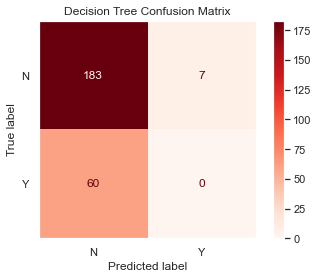

              precision    recall  f1-score   support

           N       0.75      0.96      0.85       190
           Y       0.00      0.00      0.00        60

    accuracy                           0.73       250
   macro avg       0.38      0.48      0.42       250
weighted avg       0.57      0.73      0.64       250



In [91]:
#Decision Tree model

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5,  min_samples_leaf=5, min_samples_split=4, max_features=9)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy : {dtc_train_acc}")
print(f"Test accuracy : {dtc_test_acc}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Decision Tree Confusion Matrix")
plt.grid(visible=False)
plt.show()

print(classification_report(y_test, y_pred))

In [92]:
#GridSearchCV to find best parameters for random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

params = {'criterion' : ['gini', "entropy", "log_loss"], 
          'max_depth' : range(2,11,1),
         'n_estimators' : range(2,11,1),
         'n_jobs': [2,3,4,5]}

grid = GridSearchCV(RandomForestClassifier(), params, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
{'criterion': 'log_loss', 'max_depth': 9, 'n_estimators': 4, 'n_jobs': 3}


Training accuracy : 0.8093333333333333
Test accuracy : 0.764


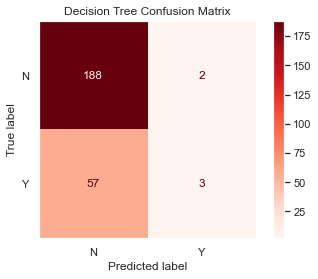

              precision    recall  f1-score   support

           N       0.77      0.99      0.86       190
           Y       0.60      0.05      0.09        60

    accuracy                           0.76       250
   macro avg       0.68      0.52      0.48       250
weighted avg       0.73      0.76      0.68       250



In [93]:
#Random forest model

rfc = RandomForestClassifier(criterion='gini', max_depth=7,  n_estimators=8, n_jobs=4)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy : {rfc_train_acc}")
print(f"Test accuracy : {rfc_test_acc}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Decision Tree Confusion Matrix")
plt.grid(visible=False)
plt.show()

print(classification_report(y_test, y_pred))

In [96]:
#GridSearchCV to find best parameters for SVC model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'sigmoid']}

grid = GridSearchCV(SVC(), params, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


Training accuracy : 0.9
Test accuracy : 0.812


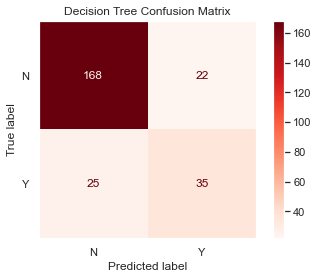

              precision    recall  f1-score   support

           N       0.87      0.88      0.88       190
           Y       0.61      0.58      0.60        60

    accuracy                           0.81       250
   macro avg       0.74      0.73      0.74       250
weighted avg       0.81      0.81      0.81       250



In [97]:
#Random forest model

svc = SVC(C=1, gamma=1, kernel='linear')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy : {svc_train_acc}")
print(f"Test accuracy : {svc_test_acc}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Decision Tree Confusion Matrix")
plt.grid(visible=False)
plt.show()

print(classification_report(y_test, y_pred))

In [104]:
#model comparison
model_comparison = pd.DataFrame({
    'Model' : ['SVC', 'Decision Tree', 'Random Forest'],
    'Score' : [svc_test_acc, dtc_test_acc, rfc_test_acc]
})

model_comparison.reset_index()
model_comparison.set_index('Model')
model_comparison.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVC,0.812
2,Random Forest,0.764
1,Decision Tree,0.732


The SVC model yields the maximum test accuracy score, we can say that SVC model works best for the given dataset.